In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
# from AlgoTestFactory import *

# altf1 = AlgoTestFactory([0, 10000], 15, savePath="Combined_4_test2", storeAccuracies=True)

# altf1.run()

In [3]:
from SktWsegRWR_utf8 import *
import pickle
import ProbData
from ProbModels import *
import multiprocessing
import math
import json
import pprint
import csv
from utilities import *
from IPython.display import display
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import pandas as pd
%matplotlib inline

Dataloader Started[Prob]...
Dataloader Finished[Prob]...


In [4]:
pb = ProbModels(fullCo_oc_mat = ProbData.fullCo_oc_mat, unigram_counts = ProbData.unigram_counts,
               cng2cngFullMat = ProbData.cng2cngFullMat, cng2index_dict = ProbData.cng2index_dict,
               w2w_samecng_fullmat=ProbData.w2w_samecng_fullmat, samecng_unigram_counts=ProbData.samecng_unigram_counts,
               v2c_fullMat = ProbData.v2c_fullMat)

loaded_SKT = pickle.load(open('../Simultaneous_CompatSKT_10K.p', 'rb'))
loaded_DCS = pickle.load(open('../Simultaneous_DCS_10K.p', 'rb'))

algo = SktWsegRWR(
            w2w_modelFunc = pb.get_w2w_mat, 
            t2t_modelFunc = pb.get_cng2cng_mat,
            v2c_modelFunc = pb.get_v2c_ranking,
            sameCng_modelFunc = pb.get_w2w_samecng_mat,
            partition=[0.25, 0.25, 0.25, 0.1]
        )

In [8]:
# goodFileDict = {}
# new_flist = os.listdir('../TextSegmentation/CompatSKT/')
# for f in new_flist:
#     goodFileDict[f] = '../TextSegmentation/CompatSKT/' + f
# pickle.dump(goodFileDict, open('mergedGood_CompatSKT.p', 'wb'))

In [10]:
# df_pf1 = pd.read_csv('extras/pvbnhi@pf.csv', header=None, names=['file', 'miss', 'miss2'])
# df_pf2 = pd.read_csv('extras/pvbnhi@skt.csv', header=None, names=['file', 'miss', 'miss2'])
# df_pf3 = pd.read_csv('extras/pvbnhi@upd.csv', header=None, names=['file', 'miss', 'miss2'])

# df_pf1['miss'] = df_pf1[df_pf1['miss'] != 'Incomplete chunk']['miss'].astype(int)
# df_pf1 = df_pf1[df_pf1['miss'] == 0]
# df_pf1['folder'] = '../TextSegmentation/Pickle_Files/'

# df_pf2['miss'] = df_pf2[df_pf2['miss'] != 'Incomplete chunk']['miss'].astype(int)
# df_pf2 = df_pf2[df_pf2['miss'] == 0]
# df_pf2['folder'] = '../TextSegmentation/corrected_10to20/'

# df_pf3['miss'] = df_pf3[df_pf3['miss'] != 'Incomplete chunk']['miss'].astype(int)
# df_pf3 = df_pf3[df_pf3['miss'] == 0]
# df_pf3['folder'] = '../TextSegmentation/Updated Pickles/'

# frames = [df_pf1, df_pf2, df_pf3]
# df_pf = pd.concat(frames)
# %reset_selective df_pf1
# %reset_selective df_pf2
# %reset_selective df_pf3
# goodFileDict = {}
# for index, row in df_pf.iterrows():
#     goodFileDict['%d.p' % row['file']] = '%s%d.p' % (row['folder'], row['file'])
len(goodFileDict)

100078

49441

In [66]:
algo.partition = np.array([0.33,0.33,0.33,0.01])

In [67]:
fs = ['31031.p2']
np.set_printoptions(precision=4)
# for f in list(goodFileDict.keys())[1:20]:
# for f in list(goodFileDict.keys())[1:100]:
for f in fs:
#     print('=='*20)
    sentenceObj, dcsObj = loadSentence_nopre(f, goodFileDict[f])
    if(sentenceObj != None):
        result = algo.predict(sentenceObj, dcsObj, verbose = False, supervised=True, eta=0.1)
        if(result != None):
            solution = [rom_slp(c) for arr in dcsObj.lemmas for c in arr]
            ac = Accuracy(result, dcsObj)
            print(f, "\t", ac)

31031.p2 	 66.66666666666667


In [107]:
f = '30240.p'
# print(goodFileDict[f])
s, d = loadSentence(f, '../TextSegmentation/Updated Pickles/30240.p')
SeeSentence(s)
SeeDCS(d)

NameError: name 'loadSentence' is not defined

In [176]:
algo.partition = np.array([0.8,0.33,0.33,0.01])
fs = ['43960.p2']
def debugSentences(fs):
    np.set_printoptions(precision=4)
    # for f in list(goodFileDict.keys())[1:20]:
    # for f in list(goodFileDict.keys())[1:100]:
    for f in fs:
    #     print('=='*20)
        sentenceObj, dcsObj = loadSentence_nopre(f, goodFileDict[f])
        solution = [rom_slp(c) for arr in dcsObj.lemmas for c in arr]
        solution_no_pvb = [removePrefix(l) for l in solution]
#         print('='*40)
#         print(dcsObj.lemmas)
#         print(solution)

#         SeeSentence(sentenceObj)
        if(sentenceObj != None):
            result, detail = algo.predict(sentenceObj, dcsObj, verbose = True)
            if(result != None):
                solution = [rom_slp(c) for arr in dcsObj.lemmas for c in arr]
                ac = Accuracy(result, dcsObj)
                print(f, "\t", ac)
#                 display(detail['sentence'])
                display(detail['DCSLemmas'])
                
                display(result)
#                 print(detail['nodeList'])
                print('Initial Query:', detail['initialQuery'])
                for step in range(detail['steps']):
                    print('-'*30)
                    print('Step:', step)
                    print('-'*30)
                    print('Winner:', detail[str(step)]['winner'])
                    print('Removed:', detail[str(step)]['removed'])
                    print('Query:', detail[str(step)]['updated_query'])
                    print(detail[str(step)]['w2w_samecng_score'])
        print('='*30)

debugSentences(fs)

43960.p2 	 20.0


[['prajApati'], ['BfSASva'], ['putra'], ['satya', 'parAkrama']]

['putra',
 'as',
 'idam',
 'para',
 'a',
 'a',
 'krama',
 'ASu',
 'prajA',
 'pat',
 'a',
 'BfSa']

Initial Query: [33]
------------------------------
Step: 0
------------------------------
Winner: (37, 'sati', 'as', -10)
Removed: [(35, 'sati', 'sat', 49), (36, 'sati', 'sat', 51), (34, 'satya', 'satya', 3), (38, 'satI', 'sat', 76), (39, 'satI', 'sat', 30), (40, 'satI', 'sat', 36), (41, 'satI', 'sat', 3)]
Query: [33, 37]
[[ 0.0161  0.0161  0.0232  0.0023  0.0002  0.0023  0.0023  0.0023  0.0022
   0.0022  0.0013  0.0012  0.0003  0.0238  0.      0.      0.0238  0.0006
   0.0238  0.0027  0.0027  0.0027  0.0026  0.0028  0.0028  0.0028  0.0028
   0.      0.      0.      0.0701  0.0701  0.0039  0.4235  0.0071  0.      0.
   0.0057  0.      0.      0.      0.      0.0413  0.0413  0.0002  0.0452
   0.1066  0.      0.0001  0.0001  0.0002  0.0183]]
------------------------------
Step: 1
------------------------------
Winner: (30, 'asya', 'idam', 149)
Removed: [(31, 'asya', 'idam', 151), (13, 'aSvasya', 'aSva', 149), (14, 'ASvasya', 'ASva', 149), (15, 'ASvasya', 'ASva', 151), (16, 'aSvasya', 'aS

In [9]:
defaultPartition = [0.33,0.33,0.33,0]

# algo.partition = np.random.random(size=(4,))
algo.partition = np.array(defaultPartition)
algo.partition /= np.sum(algo.partition)

with open('.temp/partition_datas_03_noreset_but_normalize_0.1eta.csv', 'w') as wcsv_fh:
    wcsv = csv.writer(wcsv_fh)
    for f in loaded_SKT.keys():
    # for f in fullfs:
        sentenceObj = loaded_SKT[f]
        dcsObj = loaded_DCS[f]
        if(sentenceObj != None):
#             if any(algo.partition[:-1:] < 0.05) or any(algo.partition[:-1:] > 0.95):
#                 wcsv.writerow(algo.partition)
# #                 algo.partition = np.random.random(size=(4,))
#                 algo.partition = np.array(defaultPartition)
#                 algo.partition /= np.sum(algo.partition)
            result = algo.predict(sentenceObj, dcsObj, supervised=True, eta = 0.1, weightCollectorCSV = wcsv)
            if(result != None):
                ac = Accuracy(result, dcsObj)
                solution = [rom_slp(c) for arr in dcsObj.lemmas for c in arr]
#                 print(result)
#                 print('vs')
#                 print(solution)

#                 print(f, "\t", ac)

Empty name in file 240430
Empty name in file 333881
Empty name in file 7302
Empty name in file 32452
Empty name in file 389091
Empty name in file 431033
Empty name in file 310144
Empty name in file 131042
Empty name in file 32130
Empty name in file 19229
Empty name in file 156107
Empty name in file 190965


In [10]:
print(algo.partition)
algo.partition/np.sum(algo.partition)

[ 0.32  0.33  0.32  0.  ]


array([ 0.33,  0.34,  0.33,  0.  ])

In [31]:
# fullfs = ['105587.p','293473.p','379245.p']
fullfs = ['302864.p', '292204.p', '161425.p', '128533.p', '265112.p', '16349.p', '320178.p', '334655.p', '331468.p', '365975.p', '434538.p', '148267.p', '340997.p', '204751.p', '289589.p', '423330.p', '276728.p', '105056.p', '325962.p', '383515.p', '60055.p', '228316.p', '192549.p', '169215.p', '393452.p', '433996.p', '440103.p', '68686.p', '157189.p', '440567.p']

In [6]:
fullfs = ['302864.p', '292204.p', '161425.p', '128533.p', '265112.p', '16349.p', '320178.p', '334655.p', '331468.p', '365975.p', '434538.p', '148267.p', '340997.p', '204751.p', '289589.p', '423330.p', '276728.p', '105056.p', '325962.p', '383515.p', '60055.p', '228316.p', '192549.p', '169215.p', '393452.p', '433996.p', '440103.p', '68686.p', '157189.p', '440567.p']
def GetSomeJSON():
    lowScore = []
    midScore = []
    highScore = []
    np.set_printoptions(precision=4)
#     for i in range(1, 400):
#         f = list(goodFileDict.keys())[i]
#     print(len(fullfs))
    for f in fullfs:
        sentenceObj, dcsObj = loadSentence(f, goodFileDict[f])
        if(sentenceObj != None):
            result, runDetails = algo.predict(sentenceObj, dcsObj, verbose = True)

            if(result != None):
                runDetails['file'] = f
                ac = runDetails['accuracy']
#                 print(f, ac)

                # CODE FOR SELECTING FILES 
#                 if(i%100 == 0):
#                     print('Chekpoint:', i)
                if(ac <= 40):
                    lowScore.append(runDetails)
                elif (ac <= 60):
                    if(ac >= 45):
                        midScore.append(runDetails)
                elif (ac <= 100):
                    if(ac >= 80):
                        highScore.append(runDetails)

    print('Lowscore files found:', len(lowScore))
    print('Midscore files found:', len(midScore))
    print('Highscore files found:', len(highScore))

    lowScore = lowScore[0:10]
    midScore = midScore[0:10]
    highScore = highScore[0:10]
    pickle.dump(lowScore, open('lowScore.p', 'wb'))
    pickle.dump(midScore, open('midScore.p', 'wb'))
    pickle.dump(highScore, open('highScore.p', 'wb'))

#=================================================================
GetSomeJSON()

NameError: name 'loadSentence' is not defined

In [7]:
def MacroAccuracy():
    allAcs = []
    np.set_printoptions(precision=4)
    algo.partition = np.array([0.35, 0.1, 0.55, 0.0])
    i = 0
    for f in loaded_SKT.keys():
        i += 1
    # for f in fullfs:
        sentenceObj = loaded_SKT[f]
        dcsObj = loaded_DCS[f]
        if(sentenceObj != None):
            result = algo.predict(sentenceObj, dcsObj, verbose = False)
            
            if(result != None):
#                 print(result)
#                 print(dcsObj.lemmas)
                ac = Accuracy(result, dcsObj)
                allAcs.append(ac)
#                 print(f, ac)

                # CODE FOR SELECTING FILES 
                if(i%100 == 0):
                    print('Chekpoint:', i)
    allAcs = np.array(allAcs)
    return allAcs


#=================================================================
allAcs = MacroAccuracy()

Chekpoint: 100
Chekpoint: 200
Chekpoint: 400
Chekpoint: 500
Chekpoint: 600
Chekpoint: 700
Chekpoint: 800
Chekpoint: 900
Chekpoint: 1000
Chekpoint: 1100
Chekpoint: 1300
Chekpoint: 1400
Empty name in file 240430
Chekpoint: 1500
Chekpoint: 1600
Chekpoint: 1700
Chekpoint: 1800
Chekpoint: 1900
Chekpoint: 2000
Chekpoint: 2100
Chekpoint: 2200
Chekpoint: 2300
Chekpoint: 2400
Chekpoint: 2500
Empty name in file 333881
Chekpoint: 2600
Chekpoint: 2700
Chekpoint: 2800
Empty name in file 7302
Chekpoint: 2900
Chekpoint: 3000
Chekpoint: 3100
Chekpoint: 3200
Chekpoint: 3300
Chekpoint: 3400
Chekpoint: 3500
Chekpoint: 3700
Chekpoint: 3900
Chekpoint: 4000
Chekpoint: 4100
Chekpoint: 4200
Chekpoint: 4400
Chekpoint: 4500
Chekpoint: 4600
Chekpoint: 4700
Chekpoint: 4800
Chekpoint: 4900
Chekpoint: 5000
Chekpoint: 5100
Chekpoint: 5200
Chekpoint: 5300
Empty name in file 32452
Chekpoint: 5500
Chekpoint: 5600
Chekpoint: 5800
Empty name in file 389091
Chekpoint: 5900
Chekpoint: 6000
Chekpoint: 6100
Empty name in fil

Partition: [ 0.35  0.1   0.55  0.  ]
8756
74.0184180574
Min: 0.000000, Max: 100.000000


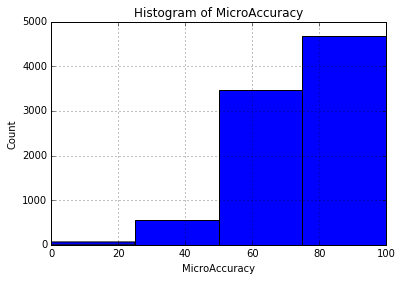

Macro Accuracy %: 16.2174508908


In [8]:
print('Partition:', algo.partition)
print(len(allAcs))
print(np.mean(allAcs))
print('Min: %f, Max: %f' % (np.min(allAcs), np.max(allAcs)))
# the histogram of the data
n, bins, patches = plt.hist(allAcs, 4, normed=False)
plt.xlabel('MicroAccuracy')
plt.ylabel('Count')
plt.title('Histogram of MicroAccuracy')
plt.grid(True)
plt.show()

print('Macro Accuracy %:', 100*np.sum(allAcs >= 95)/allAcs.shape[0])

In [ ]:
K

In [ ]:
def SeeSomeJSON(region = 'mid', files = ['lowScore.p', 'midScore.p', 'highScore.p']):
    np.set_printoptions(precision=3)
    if region == 'low':
        p = pickleFixLoad(files[0])
    elif region == 'mid':
        p = pickleFixLoad(files[1])
    else:
        p = pickleFixLoad(files[2])
#     for pf in p:
#         print(pf['file'])
    n_steps = p[0]['steps']
    for s in range(n_steps):
        
        print('Step:', s)
        print('='*20)
        
        for key, val in p[0][str(s)].items():
            print(key, ":")
            print(val)
            print('-'*20)
        
SeeSomeJSON('low')
print('='*20)
SeeSomeJSON('mid')
print('='*20)
SeeSomeJSON('high')

In [68]:
def ArePredictionsOK():
    with open('.temp/weird.csv', 'w') as fh:
        wcsv = csv.writer(fh)
        wcsv.writerow(['filename', 'sentence', 'solution', 'prediction'])
        np.set_printoptions(precision=4)
        badCount = 0
        for i in range(1, 600):
            f = list(goodFileDict.keys())[i]

            sentenceObj, dcsObj = loadSentence(f, goodFileDict[f])
            if(sentenceObj != None):
                result = algo.predict(sentenceObj, dcsObj, verbose = False)
                if(result != None):            
                    solution = [rom_slp(c) for arr in dcsObj.lemmas for c in arr]
                    ac = Accuracy(result, dcsObj)
                    if ac >= 100 and len(result) != len(solution):
                        badCount += 1
                        if(badCount%10 == 0):
                            print("="*40)
                        sline = [f, sentenceObj.sentence, solution, result]
                        wcsv.writerow(sline)
        print(badCount, 'weird predictions encountered.')
        
ArePredictionsOK()

35 weird predictions encountered.


In [9]:
sentenceObj, dcsObj = loadSentence('1.p', '../TextSegmentation/corrected_10to20/1.p')
SeeSentence(sentenceObj)

SKT ANALYZE
---------------
paYca ratnAni muKyAni coparatnacatuzwayam   
Analyzing: paYca
-------------------------
Analyzing: ratnAni
0 : ratnAni [0, 'ratna', 81] [1, 'ratna', 41] 
0 : ratnAni [2, 'ratna', 61] 
-------------------------
Analyzing: muKyAni
0 : muKyAni [3, 'muKya', 81] [4, 'muKya', 41] 
0 : muKyAni [5, 'muKya', 61] 
-------------------------
Analyzing: coparatnacatuzwayam
0 : ca [6, 'ca', 2] 
9 : catuzwayam [7, 'catuzwaya', 31] [8, 'catuzwaya', 69] [9, 'catuzwaya', 71] 
4 : ratna [10, 'ratna', 3] 
1 : uparatna [11, 'uparatna', 3] 
1 : Upa [12, 'vap', -158] 
-------------------------
Analyzing  paYca
0 :  paYca [] []
Analyzing  ratnAni
0 :  ratnAni ['ratna'] [{'noun': ['acc. pl. n.', 'nom. pl. n.']}]
0 :  ratnAni ['ratna'] [{'noun': ['voc. pl. n.']}]
Analyzing  muKyAni
0 :  muKyAni ['muKya'] [{'noun': ['acc. pl. n.', 'nom. pl. n.']}]
0 :  muKyAni ['muKya'] [{'noun': ['voc. pl. n.']}]
Analyzing  coparatnacatuzwayam
0 :  ca ['ca'] [{'indeclinable': ['conj.']}]
9 :  catuzwa

In [8]:
SeeDCS(dcsObj)

DCS ANALYZE
---------------
upacAreRa SIlena rUpayOvanasaMpadA   
[['upacāra'], ['śīla'], ['rūpa', 'yauvana', 'sampad']]
Lemmas: ['upacAra', 'SIla', 'rUpa', 'yOvana', 'sampad']
[['89'], ['91'], ['3', '3', '90']]



In [7]:
def CSVforSupervised():
    np.set_printoptions(precision=4)
    # Clean the csv files
    metPerfFH = open('.temp/metPerfFH.csv', 'w')
    metPerfFH_bin = open('.temp/metPerfFH_bin.csv', 'w')

    metPerfFH.write('w2w,t2t,w2w_samecng,InDCS\n')
    metPerfFH_bin.write('w2w,t2t,w2w_samecng,InDCS\n')

    metPerfFH.close()
    metPerfFH_bin.close()
    ######################
    gfl = list(goodFileDict.keys())
    for i in range(0, 11000):
        f = gfl[i]
        if(i%250 == 0):
            print('Checkpoint:', i)
        sentenceObj, dcsObj = loadSentence(f, goodFileDict[f])
        
        if(sentenceObj != None):
            result, runDetails = algo.predict(sentenceObj, dcsObj, verbose = True)




In [ ]:
np.set_printoptions(precision=6)
jsonBatch = []
for f_ in lowScore[0:10]:
    f = f_[0]
    sentenceObj, dcsObj = loadSentence(f, goodFileDict[f])
    if(sentenceObj != None):
        result, runDetails = algo.predict(sentenceObj, dcsObj, verbose = True)
        runDetails['file'] = f
        jsonBatch.append(runDetails)
pickle.dump(jsonBatch, open('.temp/lowScore.p','wb'))
print('33 % Complete')
#################################################################
jsonBatch = []
for f_ in midScore[0:10]:
    f = f_[0]
    sentenceObj, dcsObj = loadSentence(f, goodFileDict[f])
    if(sentenceObj != None):
        result, runDetails = algo.predict(sentenceObj, dcsObj, verbose = True)
        runDetails['file'] = f
        jsonBatch.append(runDetails)
pickle.dump(jsonBatch, open('.temp/midScore.p','wb'))
print('67 % Complete')
#################################################################
jsonBatch = []
for f_ in highScore[0:10]:
    f = f_[0]
    sentenceObj, dcsObj = loadSentence(f, goodFileDict[f])
    if(sentenceObj != None):
        result, runDetails = algo.predict(sentenceObj, dcsObj, verbose = True)
        runDetails['file'] = f
        jsonBatch.append(runDetails)
print(pprint.pprint(jsonBatch))
pickle.dump(jsonBatch, open('.temp/highScore.p','wb'))
print('100 % Complete')

In [7]:
baseline_SKTs = pickle.load(open('../Simult_baselineSKT.p', 'rb'))

In [10]:
def DownloadBaselineOutput():
    pb = ProbModels(fullCo_oc_mat = ProbData.fullCo_oc_mat, unigram_counts = ProbData.unigram_counts,
               cng2cngFullMat = ProbData.cng2cngFullMat, cng2index_dict = ProbData.cng2index_dict,
               w2w_samecng_fullmat=ProbData.w2w_samecng_fullmat, samecng_unigram_counts=ProbData.samecng_unigram_counts,
               v2c_fullMat = ProbData.v2c_fullMat)

    algo = SktWsegRWR(
                w2w_modelFunc = pb.get_w2w_mat, 
                t2t_modelFunc = pb.get_cng2cng_mat,
                v2c_modelFunc = pb.get_v2c_ranking,
                sameCng_modelFunc = pb.get_w2w_samecng_mat,
                partition=[0.25, 0.25, 0.25, 0.1]
            )
    
    counter = 0
    no_query = 0
    with open('baseline_outputs_post.csv', 'w') as fh:
        bcsv = csv.writer(fh)
        bcsv.writerow(['filename', 'lemma', 'name', 'cng', 'pos', 'source'])
        for f in baseline_SKTs.keys():
            counter += 1
#             if counter % 200 == 0:
#                 print('chekpoint', counter)
#                 if counter > 20:
#                     break

            skt = baseline_SKTs[f]
            if skt != None:
                result, runDetails = algo.predict(skt, None, verbose = True)
                if result == None:
                    no_query += 1
#                     SeeSentence(skt)
                    continue
                (chunkDict, lemmaList, wordList, revMap2Chunk, qu, cngList, verbs, tuplesMain) = SentencePreprocess(skt)
    #             print(runDetails.keys())
    #             SeeSentence(skt)
    #             display(runDetails['nodeList'])
    #             print('STEPS:', int(runDetails['steps']))
    #             print(eval(runDetails['initialQuery']))
                for qi in eval(runDetails['initialQuery']):
                    cid, pos, tid = revMap2Chunk[int(qi)]
    #                 print([f, lemmaList[qi], wordList[qi], cngList[qi], pos, 'initial_query'])
                    bcsv.writerow([f, lemmaList[qi], wordList[qi], cngList[qi], pos, 'initial_query'])
                for step in range(int(runDetails['steps'])):
                    wt = runDetails[str(step)]['winner']
                    cid, pos, tid = revMap2Chunk[wt[0]]
    #                 print([f, wt[2], wt[1], wt[3], pos, 'winner'])
                    bcsv.writerow([f, wt[2], wt[1], wt[3], pos, 'winner'])
            else:
                no_query += 1

    print('Can\'t form query node in', no_query, 'files')
DownloadBaselineOutput()

Can't form query node in 1076 files


In [43]:
def GetLogReg_TrainData():
    pb = ProbModels(fullCo_oc_mat = ProbData.fullCo_oc_mat, unigram_counts = ProbData.unigram_counts,
               cng2cngFullMat = ProbData.cng2cngFullMat, cng2index_dict = ProbData.cng2index_dict,
               w2w_samecng_fullmat=ProbData.w2w_samecng_fullmat, samecng_unigram_counts=ProbData.samecng_unigram_counts,
               v2c_fullMat = ProbData.v2c_fullMat)

    algo = SktWsegRWR(
                w2w_modelFunc = pb.get_w2w_mat, 
                t2t_modelFunc = pb.get_cng2cng_mat,
                v2c_modelFunc = pb.get_v2c_ranking,
                sameCng_modelFunc = pb.get_w2w_samecng_mat,
                partition=[0.35, 0.1, 0.55, 0.0]
            )
    
    counter = 0
    no_query = 0
    with open('logReg_train_full.csv', 'w') as fh:
        bcsv = csv.writer(fh)
        bcsv.writerow(['w2w', 't2t', 'scng', 'DSCLemma'])
        for f in loaded_SKT.keys():
            counter += 1
            if counter % 400 == 0:
                print('chekpoint', counter)
#                 if counter > 2:
#                     break

            skt = loaded_SKT[f]
            dcs = loaded_DCS[f]
            if skt != None:
                result, runDetails = algo.predict(skt, dcs, verbose = True)
                if result == None:
                    no_query += 1
#                     SeeSentence(skt)
                    continue
                (chunkDict, lemmaList, wordList, revMap2Chunk, qu, cngList, verbs, tuplesMain) = SentencePreprocess(skt)
                sol, solNoPvb = GetSolutions(dcs)
#                 print(runDetails.keys())
# #                 SeeSentence(skt)
#                 display(runDetails['DCSLemmas'])
#                 print('STEPS:', int(runDetails['steps']))
#                 print(eval(runDetails['initialQuery']))
                for step in range(int(runDetails['steps'])):
                    stepData = runDetails[str(step)]
#                     print(stepData['final_rank'])
                    for ri in range(np.where(stepData['winner'][0] == stepData['final_rank'])[0][0], len(stepData['final_rank'])):
#                         print(len(stepData['final_rank']))
                        w = stepData['final_rank'][ri]
#                         print(lemmaList[w] in sol,lemmaList[w] in solNoPvb , lemmaList[w])
                        bcsv.writerow([stepData['w2w_score'][0,w], stepData['t2t_score'][0,w], stepData['w2w_samecng_score'][0,w], lemmaList[w] in sol or lemmaList[w] in solNoPvb])
            else:
                no_query += 1

    print('Can\'t form query node in', no_query, 'files')
GetLogReg_TrainData()

chekpoint 400
chekpoint 800
chekpoint 1200
Empty name in file 240430
chekpoint 1600
chekpoint 2000
chekpoint 2400
Empty name in file 333881
chekpoint 2800
Empty name in file 7302
chekpoint 3200
chekpoint 3600
chekpoint 4000
chekpoint 4400
chekpoint 4800
chekpoint 5200
Empty name in file 32452
chekpoint 5600
Empty name in file 389091
chekpoint 6000
Empty name in file 431033
chekpoint 6400
Empty name in file 310144
Empty name in file 131042
chekpoint 6800
chekpoint 7200
chekpoint 7600
chekpoint 8000
chekpoint 8400
Empty name in file 32130
chekpoint 8800
Empty name in file 19229
chekpoint 9200
Empty name in file 156107
chekpoint 9600
Empty name in file 190965
chekpoint 10000
Can't form query node in 1244 files


SKT ANALYZE
---------------
priyApriye
Analyzing  priyApriye
0 :  priya ['prya'] [{'compound': ['iic.']}]
0 :  priyA ['prya'] [{'noun': ['nom. sg. f.']}]
4 :  Apriye ['AprI'] [{'noun': ['dat. sg. f.']}]
4 :  apriye ['pf', 'pf'] [{'verb': ['impft. ps. sg. 1']}, {'verb': ['impft. ps. sg. 1']}]
4 :  a ['a'] [{'compound': ['iic.']}]
5 :  priye ['prya'] [{'noun': ['loc. sg. m.', 'acc. du. n.', 'nom. du. n.', 'loc. sg. n.', 'acc. du. f.', 'nom. du. f.']}]
5 :  priye ['prya'] [{'noun': ['voc. du. n.', 'voc. du. f.', 'voc. sg. f.']}]
5 :  priye ['pf', 'pf'] [{'verb': ['pr. ps. sg. 1']}, {'verb': ['pr. ps. sg. 1']}]

